In [1]:
#AAH extended
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math,cmath
from scipy.sparse import diags
#Creating the spectral density matrix
n=200;#laatice sites
no=100;#bath lattice point
b = (1+math.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 1.0]
sitegammastrnlow = [1.0, 1.0, 1.0]
sitegammastrnhigh = [1.0,1.0,1.0]
sitegammastrn0 = [1.0, 1.0, 1.0]
to = 1.0;#bath tunneling potential
t = 1.0;#system hopping
lamba = 0.05
alpha = 0.0
sitepotential = 1.0;#bath site potential(constant)
sitepotentialAAH = np.zeros(n)
#temp = np.zeros(n)
#for i in range (0,n-1):
#    temp[i] = i
#    sitepotentialAAH[i] = 2*lamba*math.cos(2*math.pi*b*(i+1))/(1+alpha*math.cos(2*math.pi*b*(i+1)))
#epsilonbath = np.arange(-10,10,0.001);#empty list for fermi enrgy
#ni = len(epsilonbath)
def selfenergy(gamma,energy):
    mat = (gamma**2*(energy - np.sqrt(4*to**2-energy**2)*1j))/2*to**2
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = np.zeros((n,n),dtype = 'complex_')
    mat[site,site] = selfenergy(gamma,energy)
    return mat
#Green's functions
def ret_gre(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_gre0(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn0[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grelow(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnlow[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grehigh(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnhigh[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def adv_gre(energy):
    return np.transpose(np.conjugate(ret_gre(energy)))
def adv_gre0(energy):
    return np.transpose(np.conjugate(ret_gre0(energy)))
def adv_grelow(energy):
    return np.transpose(np.conjugate(ret_grelow(energy)))
def adv_grehigh(energy):
    return np.transpose(np.conjugate(ret_grehigh(energy)))
#transmission probability
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmission0(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre0(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre0(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionlow(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grelow(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grelow(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionhigh(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grehigh(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grehigh(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
free_energy = np.linspace(start=-2*to,stop=2*to,endpoint=True,num=200)
mat = np.zeros(len(free_energy), dtype = float)
matlow = np.zeros(len(free_energy), dtype = float)
mathigh = np.zeros(len(free_energy), dtype = float)
phi = np.zeros(len(free_energy), dtype = float)
for i in range(1,len(free_energy)-1):
    fe = free_energy[i]
    rl0 = trnasmission0(sitegammaindx[1],sitegammastrn0[1],sitegammaindx[0],sitegammastrn[0],fe).real
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe).real
    rlhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],sitegammaindx[0],sitegammastrnhigh[0],fe).real
    rllow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],sitegammaindx[0],sitegammastrnlow[0],fe).real
    nr = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe).real
    nrhigh = trnasmissionhigh(sitegammaindx[2],sitegammastrnhigh[2],sitegammaindx[1],sitegammastrnhigh[1],fe).real
    nrlow =  trnasmissionlow(sitegammaindx[2],sitegammastrnlow[2],sitegammaindx[1],sitegammastrnlow[1],fe).real
    nl = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe).real 
    nlhigh = trnasmissionhigh(sitegammaindx[2],sitegammastrnhigh[2],sitegammaindx[0],sitegammastrnhigh[0],fe).real
    nllow = trnasmissionlow(sitegammaindx[2],sitegammastrnlow[2],sitegammaindx[0],sitegammastrnlow[0],fe).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[2],sitegammastrn[2],fe).real
    rnhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],sitegammaindx[2],sitegammastrnhigh[2],fe).real
    rnlow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],sitegammaindx[2],sitegammastrnlow[2],fe).real
    mat[i] = (rl+(rn*nl)/(nr+nl))
    matlow[i] = (rllow+(rnlow*nllow)/(nrlow+nllow))
    mathigh[i] = (rlhigh+(rnhigh*nlhigh)/(nrhigh+nlhigh))
    phi[i] = rl0
phi[i]= [i if i>1.0E-18 else 0 for i in a]
#plt.plot(free_energy, mat,'o',label =  '$\gamma = 1.0$')
plt.plot(free_energy, phi,'o',label = '$\gamma = 0.0$')
#plt.plot(free_energy, matlow,'o',label = '$\gamma = 0.1$')
#plt.plot(free_energy, mathigh,'o',label = '$\gamma = 10.0$')
plt.title('$G/G_o$ v/s $\epsilon_{F}$ for various probe strength')
plt.xlabel('$\epsilon_{F}$')
plt.ylabel('$G/G_o$')
plt.yscae('log')
plt.legend()
plt.show()


NameError: name 'a' is not defined

In [ ]:
#Creating the spectral density matrix
n=200;#laatice sites
no=100;#bath lattice point
b = (1+math.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 1.0]
sitegammastrnlow = [1.0, 1.0, 0.1]
sitegammastrnhigh = [1.0,1.0,10.0]
sitegammastrn0 = [1.0, 1.0, 0.0]
to = 1.0;#bath tunneling potential
t = 1.0;#system hopping
lamba = 0.05
alpha = 0.0
sitepotential = 1.0;#bath site potential(constant)
sitepotentialAAH = np.zeros(n)
temp = np.zeros(n)
for i in range (0,n-1):
    temp[i] = i
    sitepotentialAAH[i] = 2*lamba*math.cos(2*math.pi*b*(i+1))/(1+alpha*math.cos(2*math.pi*b*(i+1)))
epsilonbath = np.arange(-10,10,0.001);#empty list for fermi enrgy
ni = len(epsilonbath)
def selfenergy(gamma,energy):
    mat = (gamma**2*(energy - np.sqrt(4*to**2-energy**2)*1j))/2*to**2
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = np.zeros((n,n),dtype = 'complex_')
    mat[site,site] = -2*selfenergy(gamma,energy).imag
    return mat
plt.plot(temp,sitepotentialAAH)
plt.plot()
print(sitepotentialAAH)
    

    

In [274]:
#Green's functions
def ret_gre(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_gre0(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn0[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grelow(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnlow[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grehigh(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnhigh[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def adv_gre(energy):
    return np.transpose(np.conjugate(ret_gre(energy)))
def adv_gre0(energy):
    return np.transpose(np.conjugate(ret_gre0(energy)))
def adv_grelow(energy):
    return np.transpose(np.conjugate(ret_grelow(energy)))
def adv_grehigh(energy):
    return np.transpose(np.conjugate(ret_grehigh(energy)))

In [275]:
#transmission probability
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmission0(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre0(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre0(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionlow(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grelow(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grelow(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionhigh(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grehigh(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grehigh(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)

In [280]:
free_energy = np.linspace(start=-2*to,stop=2*to,endpoint=True,num=1000)
mat = np.zeros(len(free_energy), dtype = float)
matlow = np.zeros(len(free_energy), dtype = float)
mathigh = np.zeros(len(free_energy), dtype = float)
phi = np.zeros(len(free_energy), dtype = float)
for i in range(1,len(free_energy)-1):
    fe = free_energy[i]
    rl0 = trnasmission0(sitegammaindx[1],sitegammastrn0[1],sitegammaindx[0],sitegammastrn[0],fe).real
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe).real
    rlhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],sitegammaindx[0],sitegammastrnhigh[0],fe).real
    rllow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],sitegammaindx[0],sitegammastrnlow[0],fe).real
    nr = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe).real
    nrhigh = trnasmissionhigh(sitegammaindx[2],sitegammastrnhigh[2],sitegammaindx[1],sitegammastrnhigh[1],fe).real
    nrlow =  trnasmissionlow(sitegammaindx[2],sitegammastrnlow[2],sitegammaindx[1],sitegammastrnlow[1],fe).real
    nl = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe).real 
    nlhigh = trnasmissionhigh(sitegammaindx[2],sitegammastrnhigh[2],sitegammaindx[0],sitegammastrnhigh[0],fe).real
    nllow = trnasmissionlow(sitegammaindx[2],sitegammastrnlow[2],sitegammaindx[0],sitegammastrnlow[0],fe).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[2],sitegammastrn[2],fe).real
    rnhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],sitegammaindx[2],sitegammastrnhigh[2],fe).real
    rnlow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],sitegammaindx[2],sitegammastrnlow[2],fe).real
    mat[i] = (rl+(rn*nl)/(nr+nl))
    matlow[i] = (rllow+(rnlow*nllow)/(nrlow+nllow))
    mathigh[i] = (rlhigh+(rnhigh*nlhigh)/(nrhigh+nlhigh))
    phi[i] = rl0
plt.plot(free_energy, mat,'o',label =  '$\gamma = 1.0$')
plt.plot(free_energy, phi,'o',label = '$\gamma = 0.0$')
plt.plot(free_energy, matlow,'o',label = '$\gamma = 0.1$')
plt.plot(free_energy, mathigh,'o',label = '$\gamma = 10.0$')
plt.title('$G/G_o$ v/s $\epsilon_{F}$ for various probe strength')
plt.xlabel('$\epsilon_{F}$')
plt.ylabel('$G/G_o$')
plt.legend()
plt.show()


KeyboardInterrupt: 

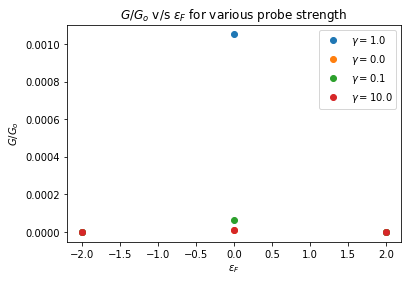

In [284]:
#AAH critical
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math,cmath
from scipy.sparse import diags
#Creating the spectral density matrix
n=200;#laatice sites
no=100;#bath lattice point
b = (1+math.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 1.0]
sitegammastrnlow = [1.0, 1.0, 0.1]
sitegammastrnhigh = [1.0,1.0,10.0]
sitegammastrn0 = [1.0, 1.0, 0.0]
to = 1.0;#bath tunneling potential
t = 1.0;#system hopping
lamba = 1.0
alpha = 0.0
sitepotential = 1.0;#bath site potential(constant)
sitepotentialAAH = np.zeros(n)
temp = np.zeros(n)
for i in range (0,n-1):
    temp[i] = i
    sitepotentialAAH[i] = 2*lamba*math.cos(2*math.pi*b*(i+1))/(1+alpha*math.cos(2*math.pi*b*(i+1)))
epsilonbath = np.arange(-10,10,0.001);#empty list for fermi enrgy
ni = len(epsilonbath)
def selfenergy(gamma,energy):
    mat = (gamma**2*(energy - np.sqrt(4*to**2-energy**2)*1j))/2*to**2
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = np.zeros((n,n),dtype = 'complex_')
    mat[site,site] = -2*selfenergy(gamma,energy).imag
    return mat
#Green's functions
def ret_gre(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_gre0(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn0[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grelow(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnlow[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grehigh(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnhigh[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def adv_gre(energy):
    return np.transpose(np.conjugate(ret_gre(energy)))
def adv_gre0(energy):
    return np.transpose(np.conjugate(ret_gre0(energy)))
def adv_grelow(energy):
    return np.transpose(np.conjugate(ret_grelow(energy)))
def adv_grehigh(energy):
    return np.transpose(np.conjugate(ret_grehigh(energy)))
#transmission probability
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmission0(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre0(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre0(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionlow(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grelow(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grelow(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionhigh(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grehigh(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grehigh(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
free_energy = np.linspace(start=-2*to,stop=2*to,endpoint=True,num=3)
mat = np.zeros(len(free_energy), dtype = float)
matlow = np.zeros(len(free_energy), dtype = float)
mathigh = np.zeros(len(free_energy), dtype = float)
phi = np.zeros(len(free_energy), dtype = float)
for i in range(1,len(free_energy)-1):
    fe = free_energy[i]
    rl0 = trnasmission0(sitegammaindx[1],sitegammastrn0[1],sitegammaindx[0],sitegammastrn[0],fe).real
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe).real
    rlhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],sitegammaindx[0],sitegammastrnhigh[0],fe).real
    rllow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],sitegammaindx[0],sitegammastrnlow[0],fe).real
    nr = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe).real
    nrhigh = trnasmissionhigh(sitegammaindx[2],sitegammastrnhigh[2],sitegammaindx[1],sitegammastrnhigh[1],fe).real
    nrlow =  trnasmissionlow(sitegammaindx[2],sitegammastrnlow[2],sitegammaindx[1],sitegammastrnlow[1],fe).real
    nl = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe).real 
    nlhigh = trnasmissionhigh(sitegammaindx[2],sitegammastrnhigh[2],sitegammaindx[0],sitegammastrnhigh[0],fe).real
    nllow = trnasmissionlow(sitegammaindx[2],sitegammastrnlow[2],sitegammaindx[0],sitegammastrnlow[0],fe).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[2],sitegammastrn[2],fe).real
    rnhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],sitegammaindx[2],sitegammastrnhigh[2],fe).real
    rnlow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],sitegammaindx[2],sitegammastrnlow[2],fe).real
    mat[i] = (rl+(rn*nl)/(nr+nl))
    matlow[i] = (rllow+(rnlow*nllow)/(nrlow+nllow))
    mathigh[i] = (rlhigh+(rnhigh*nlhigh)/(nrhigh+nlhigh))
    phi[i] = rl0
plt.plot(free_energy, mat,'o',label =  '$\gamma = 1.0$')
plt.plot(free_energy, phi,'o',label = '$\gamma = 0.0$')
plt.plot(free_energy, matlow,'o',label = '$\gamma = 0.1$')
plt.plot(free_energy, mathigh,'o',label = '$\gamma = 10.0$')
plt.title('$G/G_o$ v/s $\epsilon_{F}$ for various probe strength')
plt.xlabel('$\epsilon_{F}$')
plt.ylabel('$G/G_o$')
plt.legend()
plt.show()


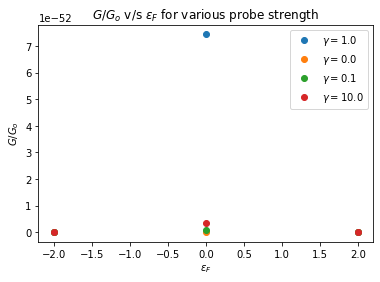

In [285]:
#AAH Disorder
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math,cmath
from scipy.sparse import diags
#Creating the spectral density matrix
n=200;#laatice sites
no=100;#bath lattice point
b = (1+math.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 1.0]
sitegammastrnlow = [1.0, 1.0, 0.1]
sitegammastrnhigh = [1.0,1.0,10.0]
sitegammastrn0 = [1.0, 1.0, 0.0]
to = 1.0;#bath tunneling potential
t = 1.0;#system hopping
lamba = 1.8
alpha = 0.0
sitepotential = 1.0;#bath site potential(constant)
sitepotentialAAH = np.zeros(n)
temp = np.zeros(n)
for i in range (0,n-1):
    temp[i] = i
    sitepotentialAAH[i] = 2*lamba*math.cos(2*math.pi*b*(i+1))/(1+alpha*math.cos(2*math.pi*b*(i+1)))
epsilonbath = np.arange(-10,10,0.001);#empty list for fermi enrgy
ni = len(epsilonbath)
def selfenergy(gamma,energy):
    mat = (gamma**2*(energy - np.sqrt(4*to**2-energy**2)*1j))/2*to**2
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = np.zeros((n,n),dtype = 'complex_')
    mat[site,site] = -2*selfenergy(gamma,energy).imag
    return mat
#Green's functions
def ret_gre(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_gre0(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn0[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grelow(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnlow[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grehigh(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnhigh[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def adv_gre(energy):
    return np.transpose(np.conjugate(ret_gre(energy)))
def adv_gre0(energy):
    return np.transpose(np.conjugate(ret_gre0(energy)))
def adv_grelow(energy):
    return np.transpose(np.conjugate(ret_grelow(energy)))
def adv_grehigh(energy):
    return np.transpose(np.conjugate(ret_grehigh(energy)))
#transmission probability
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmission0(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre0(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre0(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionlow(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grelow(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grelow(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionhigh(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grehigh(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grehigh(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
free_energy = np.linspace(start=-2*to,stop=2*to,endpoint=True,num=3)
mat = np.zeros(len(free_energy), dtype = float)
matlow = np.zeros(len(free_energy), dtype = float)
mathigh = np.zeros(len(free_energy), dtype = float)
phi = np.zeros(len(free_energy), dtype = float)
for i in range(1,len(free_energy)-1):
    fe = free_energy[i]
    rl0 = trnasmission0(sitegammaindx[1],sitegammastrn0[1],sitegammaindx[0],sitegammastrn[0],fe).real
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe).real
    rlhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],sitegammaindx[0],sitegammastrnhigh[0],fe).real
    rllow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],sitegammaindx[0],sitegammastrnlow[0],fe).real
    nr = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe).real
    nrhigh = trnasmissionhigh(sitegammaindx[2],sitegammastrnhigh[2],sitegammaindx[1],sitegammastrnhigh[1],fe).real
    nrlow =  trnasmissionlow(sitegammaindx[2],sitegammastrnlow[2],sitegammaindx[1],sitegammastrnlow[1],fe).real
    nl = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe).real 
    nlhigh = trnasmissionhigh(sitegammaindx[2],sitegammastrnhigh[2],sitegammaindx[0],sitegammastrnhigh[0],fe).real
    nllow = trnasmissionlow(sitegammaindx[2],sitegammastrnlow[2],sitegammaindx[0],sitegammastrnlow[0],fe).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[2],sitegammastrn[2],fe).real
    rnhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],sitegammaindx[2],sitegammastrnhigh[2],fe).real
    rnlow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],sitegammaindx[2],sitegammastrnlow[2],fe).real
    mat[i] = (rl+(rn*nl)/(nr+nl))
    matlow[i] = (rllow+(rnlow*nllow)/(nrlow+nllow))
    mathigh[i] = (rlhigh+(rnhigh*nlhigh)/(nrhigh+nlhigh))
    phi[i] = rl0
plt.plot(free_energy, mat,'o',label =  '$\gamma = 1.0$')
plt.plot(free_energy, phi,'o',label = '$\gamma = 0.0$')
plt.plot(free_energy, matlow,'o',label = '$\gamma = 0.1$')
plt.plot(free_energy, mathigh,'o',label = '$\gamma = 10.0$')
plt.title('$G/G_o$ v/s $\epsilon_{F}$ for various probe strength')
plt.xlabel('$\epsilon_{F}$')
plt.ylabel('$G/G_o$')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math,cmath
from scipy.sparse import diags
#Creating the spectral density matrix
n=200;#laatice sites
no=range(1,n-1);#bath lattice point
b = (1+math.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 1.0]
sitegammastrnlow = [1.0, 1.0, 0.1]
sitegammastrnhigh = [1.0,1.0,10.0]
sitegammastrn0 = [1.0, 1.0, 0.0]
to = 1.0;#bath tunneling potential
t = 1.0;#system hopping
lamba = 1.0
alpha = 0.0
sitepotential = 1.0;#bath site potential(constant)
sitepotentialAAH = np.zeros(n)
temp = np.zeros(n)
for i in range (0,n-1):
    temp[i] = i
    sitepotentialAAH[i] = 2*lamba*math.cos(2*math.pi*b*(i+1))/(1+alpha*math.cos(2*math.pi*b*(i+1)))
epsilonbath = np.arange(-10,10,0.001);#empty list for fermi enrgy
ni = len(epsilonbath)
def selfenergy(gamma,energy):
    mat = (gamma**2*(energy - np.sqrt(4*to**2-energy**2)*1j))/2*to**2
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = np.zeros((n,n),dtype = 'complex_')
    mat[site,site] = -2*selfenergy(gamma,energy).imag
    return mat
#Green's functions
def ret_gre(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_gre0(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn0[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grelow(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnlow[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grehigh(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnhigh[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def adv_gre(energy):
    return np.transpose(np.conjugate(ret_gre(energy)))
def adv_gre0(energy):
    return np.transpose(np.conjugate(ret_gre0(energy)))
def adv_grelow(energy):
    return np.transpose(np.conjugate(ret_grelow(energy)))
def adv_grehigh(energy):
    return np.transpose(np.conjugate(ret_grehigh(energy)))
#transmission probability
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmission0(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre0(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre0(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionlow(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grelow(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grelow(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionhigh(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grehigh(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grehigh(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
free_energy = np.linspace(start=-2*to,stop=2*to,endpoint=True,num=3)
mat = np.zeros(len(free_energy), dtype = float)
matlow = np.zeros(len(free_energy), dtype = float)
mathigh = np.zeros(len(free_energy), dtype = float)
phi = np.zeros(len(free_energy), dtype = float)
for i in no:
    fe = free_energy[i]
    rl0 = trnasmission0(sitegammaindx[1],sitegammastrn0[1],sitegammaindx[0],sitegammastrn[0],fe).real
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe).real
    rlhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],sitegammaindx[0],sitegammastrnhigh[0],fe).real
    rllow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],sitegammaindx[0],sitegammastrnlow[0],fe).real
    nr = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe).real
    nrhigh = trnasmissionhigh(sitegammaindx[2],sitegammastrnhigh[2],sitegammaindx[1],sitegammastrnhigh[1],fe).real
    nrlow =  trnasmissionlow(sitegammaindx[2],sitegammastrnlow[2],sitegammaindx[1],sitegammastrnlow[1],fe).real
    nl = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe).real 
    nlhigh = trnasmissionhigh(sitegammaindx[2],sitegammastrnhigh[2],sitegammaindx[0],sitegammastrnhigh[0],fe).real
    nllow = trnasmissionlow(sitegammaindx[2],sitegammastrnlow[2],sitegammaindx[0],sitegammastrnlow[0],fe).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[2],sitegammastrn[2],fe).real
    rnhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],sitegammaindx[2],sitegammastrnhigh[2],fe).real
    rnlow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],sitegammaindx[2],sitegammastrnlow[2],fe).real
    mat[i] = (rl+(rn*nl)/(nr+nl))
    matlow[i] = (rllow+(rnlow*nllow)/(nrlow+nllow))
    mathigh[i] = (rlhigh+(rnhigh*nlhigh)/(nrhigh+nlhigh))
    phi[i] = rl0
plt.plot(free_energy, mat,'o',label =  '$\gamma = 1.0$')
plt.plot(free_energy, phi,'o',label = '$\gamma = 0.0$')
plt.plot(free_energy, matlow,'o',label = '$\gamma = 0.1$')
plt.plot(free_energy, mathigh,'o',label = '$\gamma = 10.0$')
plt.title('$G/G_o$ v/s $\epsilon_{F}$ for various probe strength')
plt.xlabel('$\epsilon_{F}$')
plt.ylabel('$G/G_o$')
plt.legend()
plt.show()
